In [12]:
import json
import os
import PIL as pl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display


In [ ]:
(X_train1, y_train1), (X_test1,y_test1) = keras.datasets.cifar10.load_data()

print(len(X_train1))

50000


In [ ]:
imageWidth = 300
imageheight = 300

def generateBoxesImages():
# Iterate JSON file to find boxes  
    with open('annotations.json') as data_file:    
        data = json.load(data_file)
    for filepath, values in data.items():
        imagename = os.path.basename(filepath)
        imagename = os.path.splitext(imagename)[0]
        if imagename != 'urlImage':
            pil_image =Image.open(filepath).resize((imageWidth, imageheight),Image.ANTIALIAS)

            for coordinates in values.values():
                x1 = coordinates.get('x1')
                x2 = coordinates.get('x2')
                y1 = coordinates.get('y1')
                y2 = coordinates.get('y2')
                category = coordinates.get('category')
            # crop images based on the boxes coordinates and save them to new images
            if pil_image.mode in ("RGBA", "P"):
                im = pil_image.convert("RGB")
                im.crop((int(x1), int(y1), int(x2), int(y2))).save(
                "imgBoxes/"
                + imagename
                + '-'+category+ '-'
                + x1 + "x" + y1
                + "-"+ x2+ "x"+ y2
                + ".png"
            )
generateBoxesImages()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/M1/NNL/Projet/ImageAnnotator/img/maksssksksss729.png'

In [7]:
batch_size = 32
epochs = 30
direct = 'data'

img_dataGen = ImageDataGenerator(validation_split=0.2, rotation_range=40, 
rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
fill_mode='nearest')

train_generator = img_dataGen.flow_from_directory(directory='img',target_size=(70,70),
color_mode='rgb', seed = 42, class_mode = 'binary', subset='training', batch_size=8)

valid_generator = img_dataGen.flow_from_directory(directory='img',target_size=(70,70),
color_mode='rgb', class_mode = 'binary', shuffle = True, subset='validation', batch_size=8)

imgs, labels = next(train_generator)

#y_train = np.asarray(train_generator).astype('float32').reshape((-1,1))
#y_test = np.asarray(valid_generator).astype('float32').reshape((-1,1))


Found 112 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(directory="img", label_mode='binary',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(100, 100),
    batch_size= 32
)

val_ds = keras.utils.image_dataset_from_directory(
    directory ="img",label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(100, 100),
    batch_size=32
)

Found 139 files belonging to 2 classes.
Using 112 files for training.
Found 139 files belonging to 2 classes.
Using 27 files for validation.


In [9]:
cnn = Sequential([
        Flatten(input_shape=(70,70,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='sigmoid')    
    ])

cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model = Sequential(
    [
        Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(70, 70, 3), padding='same'
        ),
        MaxPool2D((2, 2), strides=2),

        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same'),
        MaxPool2D((2, 2), strides=2),

        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
        MaxPool2D((2, 2), strides=2),

        Flatten(),
        Dense(units=64, activation="relu"),
        Dense(units=1, activation="sigmoid")
    ])

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator,epochs=30, validation_data=valid_generator)


Epoch 1/30
14/14 [==============================] - 12s 754ms/step - loss: 0.6838 - accuracy: 0.5625 - val_loss: 0.6938 - val_accuracy: 0.5556
Epoch 2/30
14/14 [==============================] - 9s 628ms/step - loss: 0.6717 - accuracy: 0.5625 - val_loss: 0.6836 - val_accuracy: 0.5556
Epoch 3/30
14/14 [==============================] - 8s 578ms/step - loss: 0.6787 - accuracy: 0.5714 - val_loss: 0.6739 - val_accuracy: 0.5556
Epoch 4/30
14/14 [==============================] - 8s 580ms/step - loss: 0.6752 - accuracy: 0.5625 - val_loss: 0.6785 - val_accuracy: 0.5556
Epoch 5/30
14/14 [==============================] - 9s 566ms/step - loss: 0.6752 - accuracy: 0.5625 - val_loss: 0.6836 - val_accuracy: 0.5556
Epoch 6/30
14/14 [==============================] - 9s 615ms/step - loss: 0.6663 - accuracy: 0.5804 - val_loss: 0.6743 - val_accuracy: 0.5556
Epoch 7/30
14/14 [==============================] - 10s 732ms/step - loss: 0.6643 - accuracy: 0.5714 - val_loss: 0.6684 - val_accuracy: 0.5556
Epoc

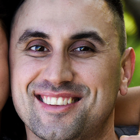



The person is not wearing a mask.



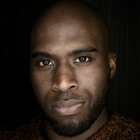



The person is not wearing a mask.



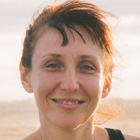



The person is not wearing a mask.



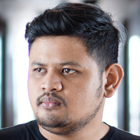



The person is not wearing a mask.



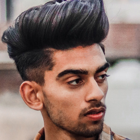



The person is not wearing a mask.



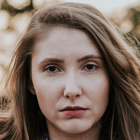



The person is not wearing a mask.



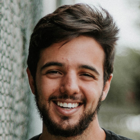



The person is not wearing a mask.



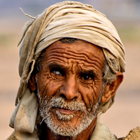



The person is wearing a mask. 



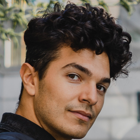



The person is not wearing a mask.



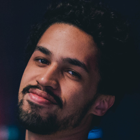



The person is not wearing a mask.



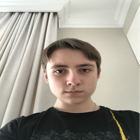



The person is not wearing a mask.



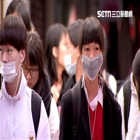



The person is wearing a mask. 



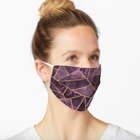



The person is wearing a mask. 



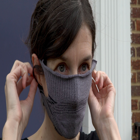



The person is wearing a mask. 



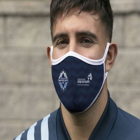



The person is wearing a mask. 



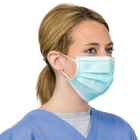



The person is wearing a mask. 



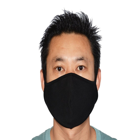



The person is wearing a mask. 



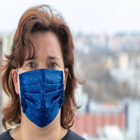



The person is wearing a mask. 



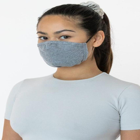



The person is wearing a mask. 



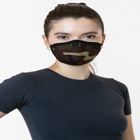



The person is wearing a mask. 



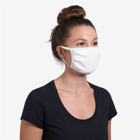



The person is wearing a mask. 



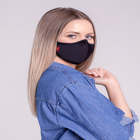



The person is wearing a mask. 



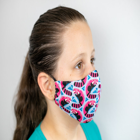



The person is wearing a mask. 



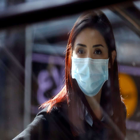



The person is wearing a mask. 



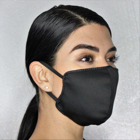



The person is wearing a mask. 



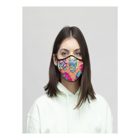



The person is wearing a mask. 



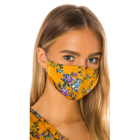



The person is wearing a mask. 



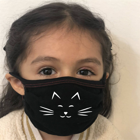



The person is wearing a mask. 



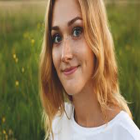



The person is not wearing a mask.



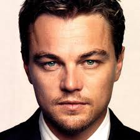



The person is not wearing a mask.



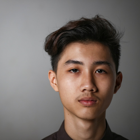



The person is not wearing a mask.



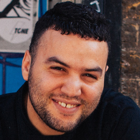



The person is not wearing a mask.



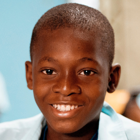



The person is not wearing a mask.



In [15]:
history
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,34):
  img_directory = 'testImages\\'+str(i) + '.png'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  img = pl.Image.open(img_directory)
  resized_img = img.resize((140, 140))

  display(resized_img)
  print("\n")
  if(int(prediction[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")

In [ ]:
y_train[:5]

train = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/30
1/1 [==============================] - 0s 108ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 86ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 95ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 108ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 103ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 116ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 119ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 115ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 119ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 112ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 11/30
1/1 [====